In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Classified Data',index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'] , test_size=0.3, random_state=101)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



[[151   8]
 [ 15 126]]


In [26]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

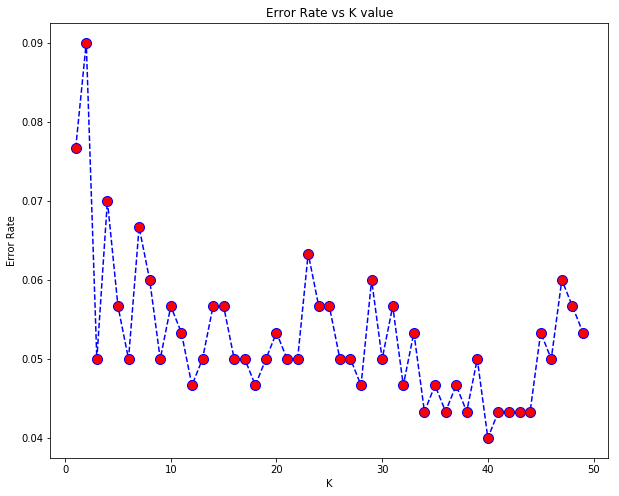

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
#COMPARISON OF k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_1 = knn.predict(X_test)

print('With K=1')
print('\n')
print(confusion_matrix(y_test, pred_1))
print('\n')
print(classification_report(y_test, pred_1))


With K=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [30]:
#COMPARISON OF k=40
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
pred_40 = knn.predict(X_test)

print('With K=40')
print('\n')
print(confusion_matrix(y_test, pred_40))
print('\n')
print(classification_report(y_test, pred_40))


With K=40


[[154   5]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

